In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from smarts import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/Users/kanhua/Dropbox/Programming/python_distribution_try/pypvcell_p3_lw/lib/python3.5/site-packages/matplotlib/cbook.py:128: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the matplotlib toolkit finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [1]:
defaults["IMASS"]=0
defaults["AMASS"]=2
file = build_smarts_file(
    **defaults
)   

data = send_to_smarts(file)

plt.plot(data.iloc[:,0],data.iloc[:,1],hold=True)
plt.plot(data.iloc[:,0],data.iloc[:,4])
plt.show()

NameError: name 'defaults' is not defined

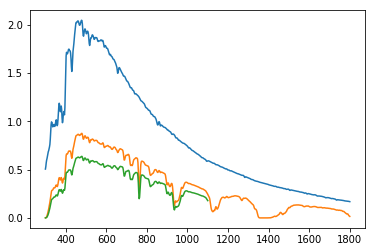

In [3]:
defaults["WV2"]=1800
defaults["IMASS"]=2
defaults["AMASS"]=2.0
file = build_smarts_file(
    **defaults
)   

data2 = send_to_smarts(file)

plt.plot(data2.iloc[:,0],data2.iloc[:,1],hold=True)
plt.plot(data2.iloc[:,0],data2.iloc[:,4])
plt.plot(data.iloc[:,0],data.iloc[:,4])
plt.show()

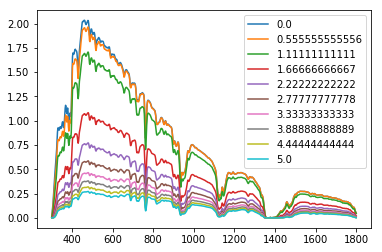

In [4]:
amass=np.linspace(0,5,num=10)
for a in amass:
    defaults["IMASS"]=2
    defaults["AMASS"]=a
    file = build_smarts_file(
        **defaults
    )   

    data2 = send_to_smarts(file)

    plt.plot(data2.iloc[:,0],data2.iloc[:,4],hold=True,label="%s"%a)

plt.legend()

In [5]:
ngo_lat=35.1814
ngo_lont=136.9064
defaults["IMASS"]=3
defaults["YEAR"]=2016
defaults["MONTH"]=12
defaults["DAY"]=20
defaults["HOUR"]=12
defaults["ZONE"]=9
defaults["LATIT"]=ngo_lat
defaults["LONGIT"]=ngo_lont

In [6]:
defaults['HOUR']=12
file = build_smarts_file(
    **defaults
)   
data2 = send_to_smarts(file)
type(data2)

pandas.core.frame.DataFrame

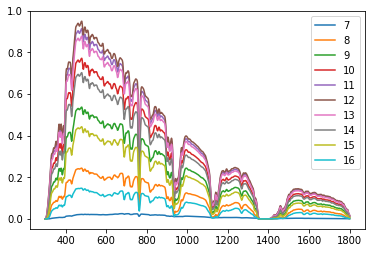

In [9]:
amass=np.linspace(0,5,num=10)
for i in range(1,23):
    defaults["IMASS"]=3
    defaults["HOUR"]=i
    file = build_smarts_file(
        **defaults
    )   

    data2 = send_to_smarts(file)

    if data2 is not None:
        plt.plot(data2.iloc[:,0],data2.iloc[:,4],hold=True,label="%s"%i)

plt.legend()

In [10]:
times=pd.date_range(start='2016-12-20 04:00',end='2016-12-21 23:00',freq='15T',tz='Japan')
df=get_clear_sky(times)
print(df.head())

                           WVLGTH  ET_SPCTRUM   BEAM_NORMAL    BEAM_NORM+  \
time                                                                        
2016-12-20 07:00:00+09:00   300.0      0.5224  4.114000e-25  4.114000e-25   
2016-12-20 07:00:00+09:00   302.0      0.5493  1.306000e-23  1.306000e-23   
2016-12-20 07:00:00+09:00   304.0      0.5897  2.747000e-22  2.747000e-22   
2016-12-20 07:00:00+09:00   306.0      0.6182  4.170000e-21  4.219000e-21   
2016-12-20 07:00:00+09:00   308.0      0.6366  4.766000e-20  4.937000e-20   

                             GLOB_HORIZ    GLOBL_TILT  
time                                                   
2016-12-20 07:00:00+09:00  7.495000e-07  7.495000e-07  
2016-12-20 07:00:00+09:00  1.950000e-06  1.950000e-06  
2016-12-20 07:00:00+09:00  4.979000e-06  4.979000e-06  
2016-12-20 07:00:00+09:00  1.124000e-05  1.124000e-05  
2016-12-20 07:00:00+09:00  2.188000e-05  2.188000e-05  


In [12]:
df.to_hdf('store_tl.h5',key='df',mode='w')

In [15]:
df.index.unique().shape

(78,)

In [16]:
78*0.25

19.5

In [ ]:
df.loc[pd.DatetimeIndex(['2016-12-20 05:00:00+09:00']),:]